<a id='intro'></a>
## INTRODUCTION
> These data which are goint to be anlyzed are about movies with large no. of features and records. There are diferent features describing the movie like popularity score, title,  genre, date, revenue, .... etc.
#### Variables:
> it Contains small no of variables like the main datadrame holding the movies which is "movies_df", and "movies_df2" which is the same but eliminating some rows, and there other variables helps with visualizations.
#### Main Features:
> popularity: Score measures the popularity of the movie

> title: Title of the movie

> genres: movie genres splitted by "|"

> runtime: movie time in minutes

> votescore: Score measures the score of the movie based on rating from users

> revenue, budget explained well by name 

## Questions to be Asked:
> **1-** What genre gets the highest revenue and popularity?

> **2-** Does high revenue associated with high budget for film makers?

> **3-** Do high rated films associated with high budget?

> **4-** Does the revenue for the films over the year are affected by the month?

#### We hopefully are  trying to answer these questions using data anlaysis process.

<a id='intro'></a>
## Importing Packages

In [195]:
# First step to import the related packages like pandas: working with dataframes and data, numpy: for any kind...
# of mathematical functions or something, matplotlib, and seaborn: for visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style('darkgrid')


In [196]:
movies_df = pd.read_csv('tmdb-movies.csv')

In [197]:
# Previening the data for better intutions
movies_df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### Preview Data Types and null Values

In [198]:
# Informations of each column like datatype and no. non-null values
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

- From the above dataframe for info function, we found some columns to drop with too much null values like homepage which is also not related to our point of interest alongside with imdb_id, cast, tagline, keywords,overview, production_companies. for the object release-date, it have to be turned into datetime datetype.

<a id='Questions'></a>
## Questions Stated

> **1-** What genre gets the highest revenue and popularity?

> **2-** Does high revenue associated with high budget for film makers?

> **3-** Do high rated films associated with high budget?

> **4-** Does the revenue for the films over the year are affected by the month?


## Data Wrangling
 - For our Data we will drop imdb_id, cast, homepage, tagline, keywords,overview, production_companies as they are not useful for our questions stated above.
 - There 're some small amount of null values which will be dropped in the next steps.
 - For problems with data types we found only one problem with release_date which have to be converted datetime datatype rather than object. Then we will rename that column to be release_month instead of release_date as it is related to our questions stated.
 - For genres, it seems to be the main genre of the movie to be the first one, so we decided to remove any other genre after the sign ' | '.



In [199]:
# After selecting some columns to eliminate by using drop function on our dataframe and keep changes.
movies_df.drop(columns= ['imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies']
        , axis= 1, inplace= True)

In [200]:
# dropna with axis 0, used to drop all rows with null values.
movies_df.dropna(axis= 0, inplace= True)

In [201]:
# In genre column we are going to take only first genre and eliminate all other using split function
movies_df['genres'] = movies_df['genres'].apply(lambda x: x.split('|')[0])

In [202]:
# To check wether there null values or not using the useful function Assert 
assert movies_df.isnull().sum().sum() == 0

In [203]:
# Eliminating all duplicated rows with drop_duplicates
movies_df.drop_duplicates(inplace= True)

In [204]:
# To check wether there duplicated rows or not 
assert movies_df.duplicated().sum() == 0

- with these two assertions we validate our data from being unduplicated or having zero null values.

In [205]:
# converting release_date to be datetime datatype rather than object datatype
movies_df.release_date = pd.to_datetime(movies_df.release_date)

- After converting release_date to be datetime datatype rather than object datatype then we will change it's name to be release_month which is integer datatype

In [206]:
# Changing it's name to be release_month which is integer datatype After extracting only integer month from the date
movies_df.release_date = movies_df.release_date.dt.month
movies_df.rename(columns= {'release_date': 'release_month'}, inplace=True)

In [207]:
# Make a simple distribution for release_month column for better intutions.
movies_df.release_month.value_counts()

9     1326
10    1144
12     977
8      910
1      907
6      826
3      819
5      808
11     807
4      797
7      794
2      685
Name: release_month, dtype: int64

### Problem Case
- We tried to chech for zero values for budget and revenue as they are main parameter for our questions and we found alot of rows contains zero budget or revenue. So we decided to drop these values when dealing with questions related to revenue and budget as a dependent variable not to misleading our solution and keep these values otherwise.

In [208]:
# Extract the revenue indexes where revenue value equal to zero using query.
revenue_indexes = movies_df.query('revenue == 0').index
# Then drop all these rows associated with these indexes.
movies_df2 = movies_df.drop(index= revenue_indexes, axis= 0)

# Extract the budget indexes where revenue value equal to zero using query.
budget_indexes = movies_df2.query('budget == 0').index
# Then drop all these rows associated with these indexes.
movies_df2.drop(index= budget_indexes, axis= 0)
movies_df2.info()

# Very imprtant N.B: We will work in the next sections with movies_df2 rather than movies_df ...
# if we are working with revenue or budget as a dependent vaiable as if we work with movies_df the results...
# will be messy not true as there alot of zero values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4848 entries, 0 to 10848
Data columns (total 14 columns):
id                4848 non-null int64
popularity        4848 non-null float64
budget            4848 non-null int64
revenue           4848 non-null int64
original_title    4848 non-null object
director          4848 non-null object
runtime           4848 non-null int64
genres            4848 non-null object
release_month     4848 non-null int64
vote_count        4848 non-null int64
vote_average      4848 non-null float64
release_year      4848 non-null int64
budget_adj        4848 non-null float64
revenue_adj       4848 non-null float64
dtypes: float64(4), int64(7), object(3)
memory usage: 728.1+ KB


<a id='eda'></a>
## Exploratory Data Analysis

- It's a fact which may be known for anyone and validated with the following figure that with years moving also the number of movies increases more and more with non-stop curve.

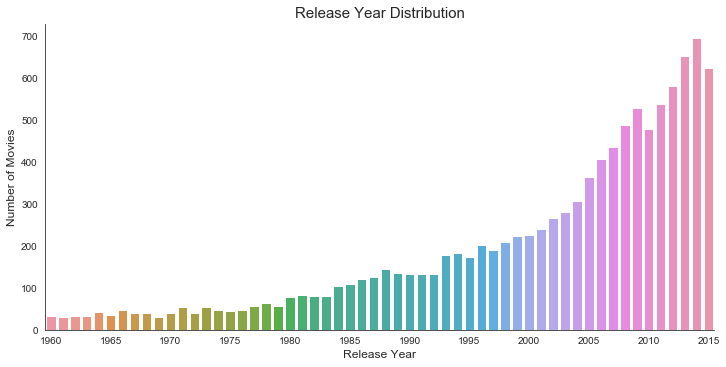

In [209]:
# Release year distribution using catblot, diffrent colors for diffrent frequncies.
with sns.axes_style('white'):
    g = sns.catplot(x = "release_year", data=movies_df, aspect=2,
                       kind="count")
    g.set_xticklabels(step=5)
    plt.xlabel('Release Year', fontsize=12)
    plt.ylabel('Number of Movies', fontsize=12)
    plt.title('Release Year Distribution', fontsize=15)
    plt.show()

In [210]:
# Creating a function for scatter plots with specific options.
def plot_scatter(x, y, xlabel, ylabel, title):
    plt.figure(figsize= (15,6))
    plt.scatter(x, y, alpha= 1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()



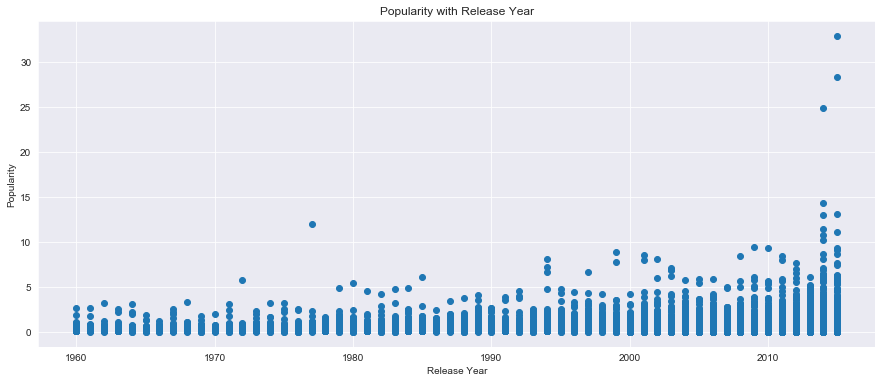

In [211]:
# Using Scatter plot function created to make it between year of release and poularity to check for any correlation
x = movies_df.release_year
y = movies_df.popularity
xlabel = 'Release Year'
ylabel = 'Popularity'
title = 'Popularity with Release Year'
plot_scatter(x,y,xlabel,ylabel, title)

-  It seems like with the release year increasing the popularity inceases as well, for new years they have also low popularity movies but for new years it have mode value for popularity more than early days.
- N.B : Here we 're dealing with movies_df dataframe which is the dataframe not droped from the zero values for the revenue, why is that? - As here we 're dealing with popularity and release year and no missing data in them so it's good to work with this dataframe as it's much bigger records.

- Here it's more obvious than before with popularity that when increasing the release year the revenue from the movies increased as well, and this also maybe also logical as the industry and the investment in the movies increased with a big scale these days.

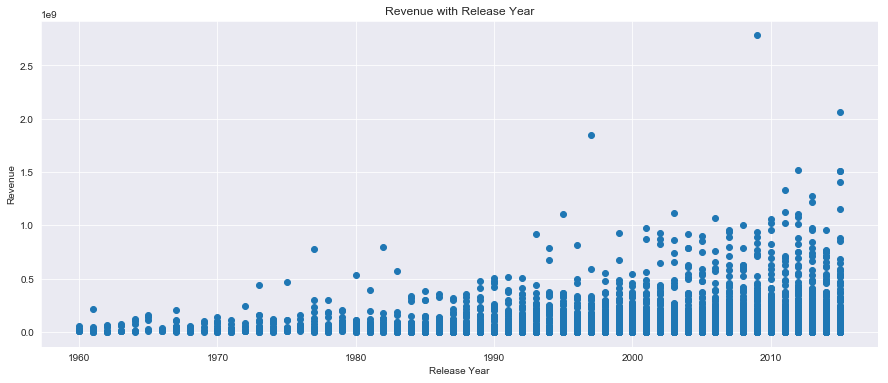

In [212]:
# Using Scatter plot function created to make it between year of release and Revenue to check for any correlation
x = movies_df2.release_year
y = movies_df2.revenue
xlabel = 'Release Year'
ylabel = 'Revenue'
title = 'Revenue with Release Year'
plot_scatter(x,y,xlabel,ylabel, title)

> **4-** Does the revenue for the films over the year are affected by the month?
- We stated that question because We assumed that will be a diffrence in revenue records with diffrent monthes. Maybe that happens for several factors like number of movies over a month according to the season or any other circumastances. 
- And it looks like we have in month 5, 6, and 7 the most mean revenue overthe whole records.

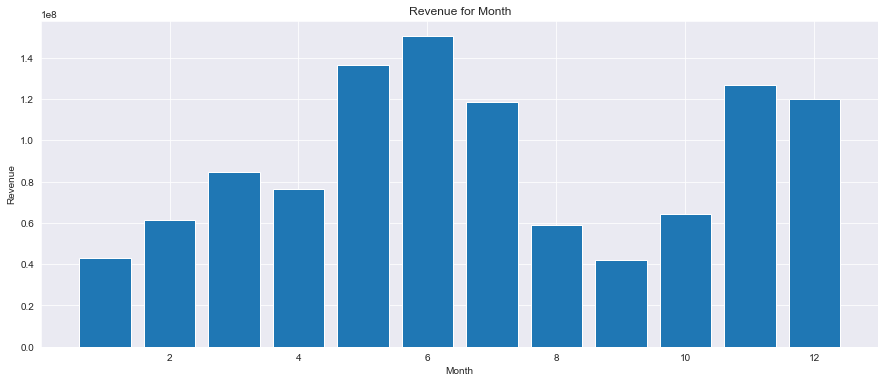

In [213]:
# Distribution of the month by revenue variable which make approximately normal one.
monthrevmean = movies_df2.groupby('release_month').revenue.mean()
plt.subplots(figsize=(15, 6))
plt.bar(monthrevmean.index, monthrevmean)
plt.title('Revenue for Month')
plt.xlabel('Month')
plt.ylabel('Revenue');
# 5,6,7 the most revenue

> **3-** Do high rated films associated with high budget?
- This is the most interesting question in the whole stated questions, does the score affected by the budget. Alot of people says the budget doesn't matter at all, it's all about the quality. But for the curve below we can state that with high budget it's very hard to find low score movie. why is that? -maybe because with high budget movies it turns the movie to be high quality but the problem not all movies becomes great with high budget, but it's a trade-off.

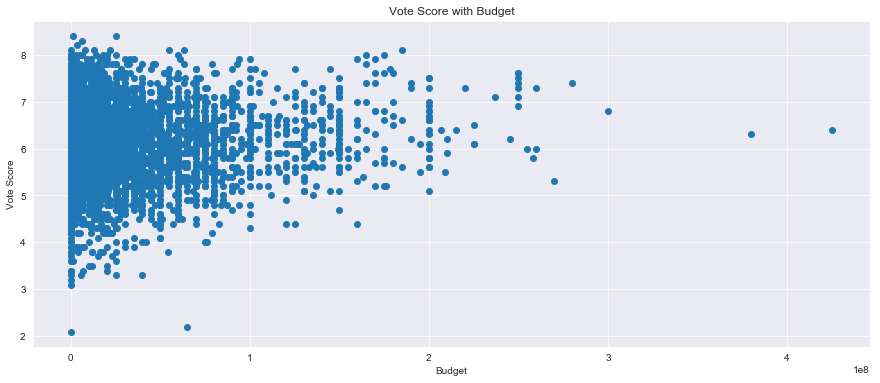

In [214]:
# Using Scatter plot function created to make it between budget and vote score to check for any correlation
x = movies_df2.budget
y = movies_df2.vote_average
xlabel = 'Budget'
ylabel = 'Vote Score'
title = 'Vote Score with Budget'
plot_scatter(x,y,xlabel,ylabel, title)


> **2-** Does high revenue associated with high budget for film makers?
This question like the above question a little, and thats what makes filmmakers pay more money and mostly that money for the actors which bring the client. So with high budget high revenue is a highet probability.

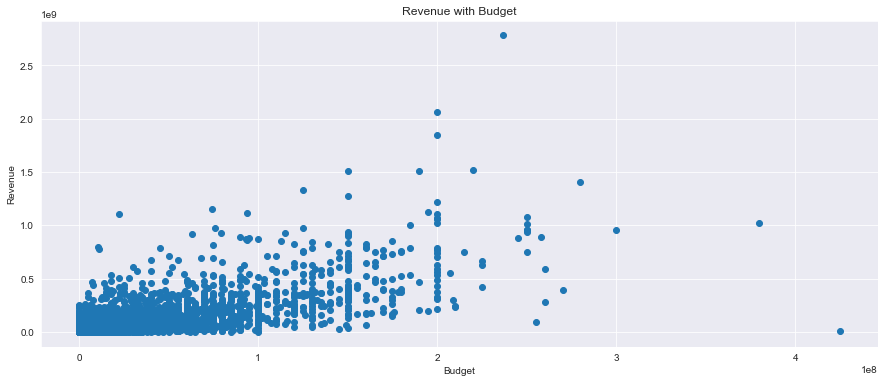

In [215]:
# Using Scatter plot function created to make it between budget and revenue to check for any correlation
x = movies_df2.budget
y = movies_df2.revenue
xlabel = 'Budget'
ylabel = 'Revenue'
title ='Revenue with Budget'
plot_scatter(x,y,xlabel,ylabel, title)


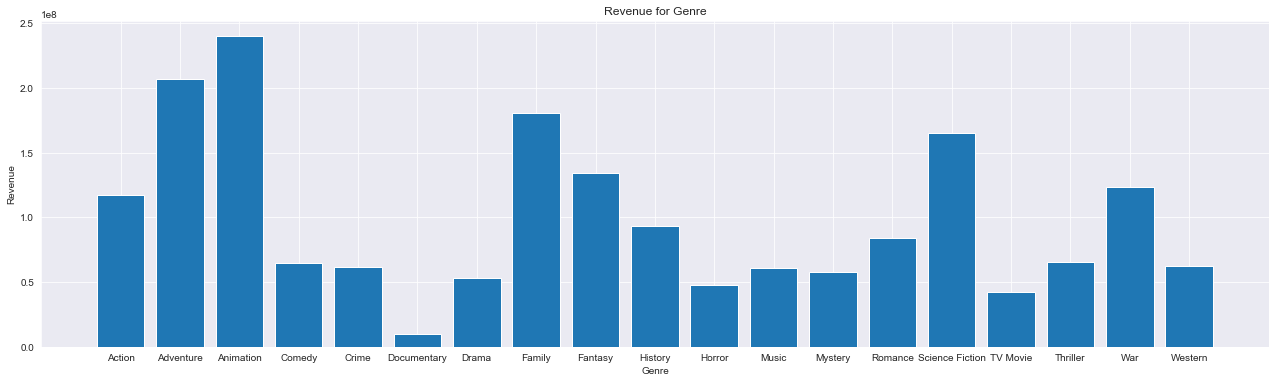

In [216]:
# Distribution of the genre by revenue variable
genreRevMean = movies_df2.groupby('genres').revenue.mean()
plt.subplots(figsize=(22, 6))
plt.bar(genreRevMean.index, genreRevMean)
plt.title('Revenue for Genre')
plt.xlabel('Genre')
plt.ylabel('Revenue');


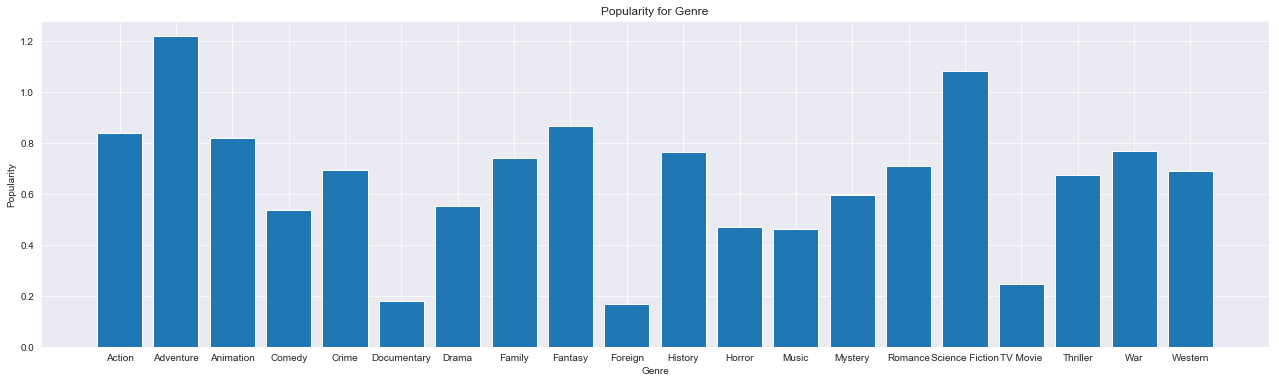

In [217]:
# Distribution of the genre by popularity variable.
genrePopMean = movies_df.groupby('genres').popularity.mean()
plt.subplots(figsize=(22, 6))
plt.bar(genrePopMean.index, genrePopMean)
plt.title('Popularity for Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity');

> **1-** What genre gets the highest revenue and popularity?
- This is good for the filmmakers to know before getting involved in the movie they invest in, above there two bar graphs showing which genre get the more popularity and revenue, what matters with filmmakers of course is the revenue which introduce that Animations gets the highest revenue but also it costs high budget, then Adventure comes and in the popularity it's the most as well. 

In [218]:
# Make a variables counts the movies per month and year
releaseMonth_movies = movies_df.release_month
releaseyear_movies = movies_df.release_year
releaseMonth_movies.median()

7.0

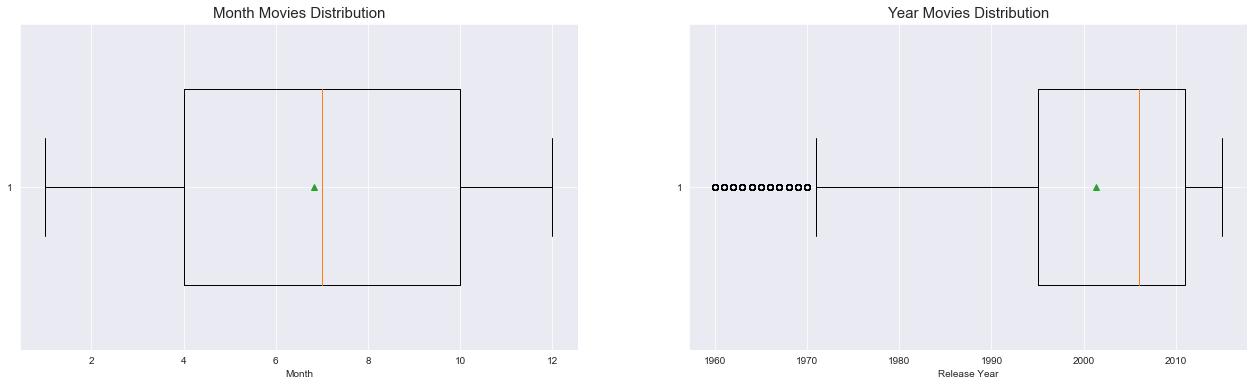

In [219]:
# The first figure shows the Month Movies 1-D Distribution and the second one shows the year Movies 1-D Distribution
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(22, 6))
ax1.boxplot(releaseMonth_movies, vert= False, widths= 0.6, showmeans = True)
ax2.boxplot(releaseyear_movies, vert= False, widths= 0.6, showmeans = True)
ax1.set(xlabel = 'Month')
ax1.set_title('Month Movies Distribution', fontsize=15)
ax2.set(xlabel = 'Release Year')
ax2.set_title('Year Movies Distribution', fontsize=15)
plt.show()

> The Median and the mean for month containing movies is approximately equivalent equal to 7 thus  the distribution is symmetric, median does not conclude that month 7 is the most month containing movies but it's the center of our data, we already conclude before that month 9 and year of 2015 are the most already. For Year distribution the data is left skewed with some outliers

## Conclusions
> We tried to figure some insights for filmmakers for example and we found for example that Animation, adventure, family, and sci-fi earns the most from the audience and also for the popularity. With alot of samples we found a good correlation between budget and revenue and also budget and vote score, of course not all high budget movies gets the most revenue and vote score but it's increase the propability for that to happen.
> Months like 5,6,7 gets more revenue and 6 is the most to earn but it isn't the most containing movies, so it's a good timing for filmmakers to put their movies in.
#### Limitations:
> We found some limitations in the data because most of our interest is in revenue and budget but about half of the records are missing for revenue and budget specially for old movies. - So we stated that when dealing with revenue and budget for conclusions or analyzing we will these null records and we wont fill them with median or something because it will lead to unaccurate results however we have another 5000 records in our hands to analyze discarding the other null records.